In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [4]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


## Sanity Check of Data

In [5]:
df.shape

(32581, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
#Check missing value
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.isnull().sum()/df.shape[0]*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [9]:
df.duplicated().sum()

165

In [10]:
#Identifying garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
******************************
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
******************************
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
******************************


## Exploratory Data Analysis

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [12]:
df.describe(include="object")

,person_home_ownership,loan_intent,cb_person_default_on_file
count,32581,32581,32581
unique,4,6,2
top,RENT,EDUCATION,N
freq,16446,6453,26836


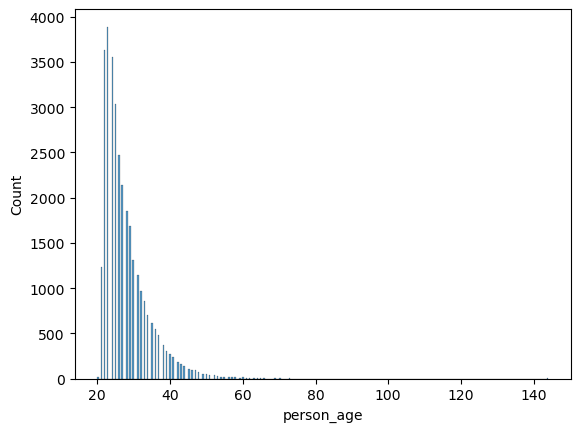

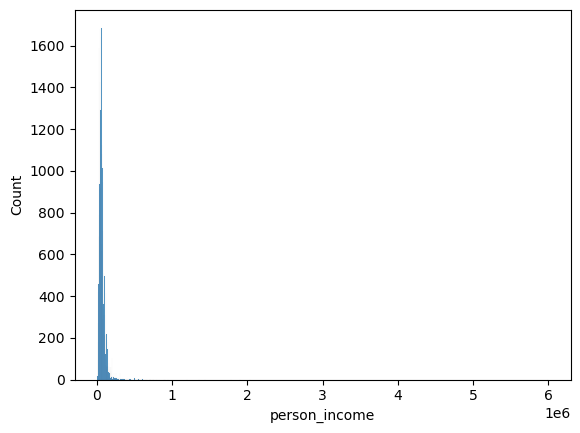

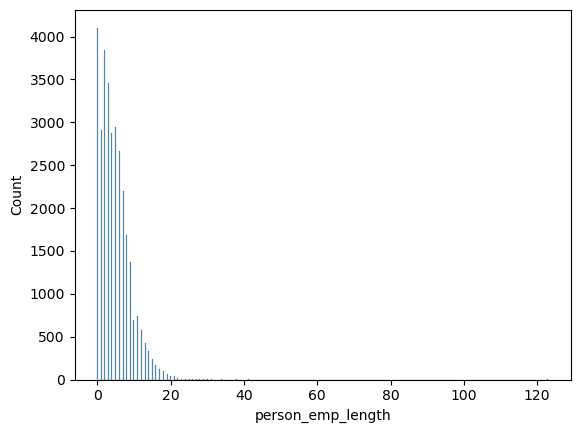

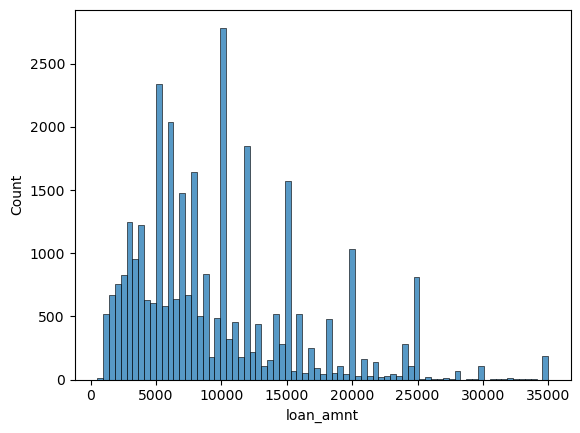

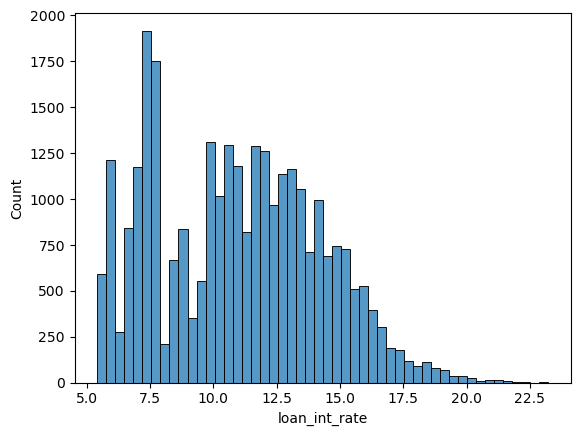

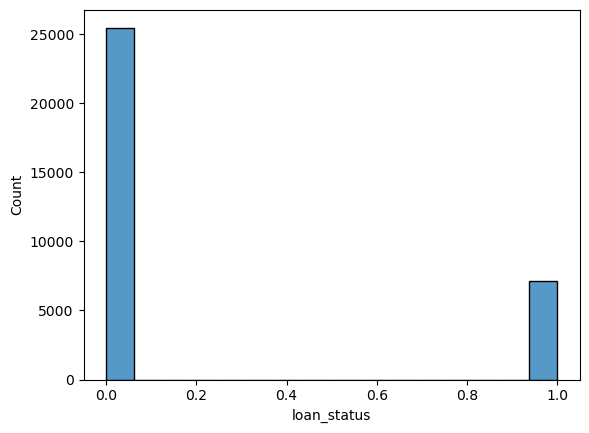

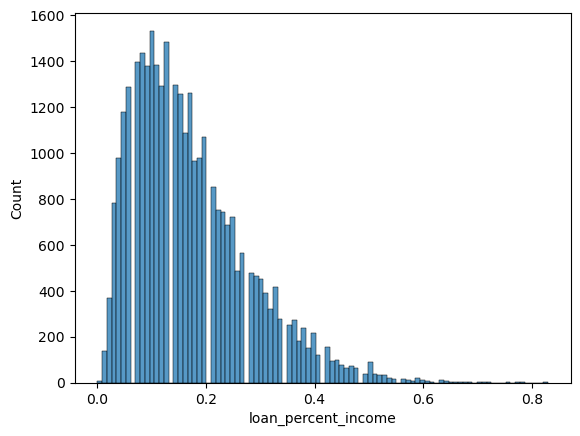

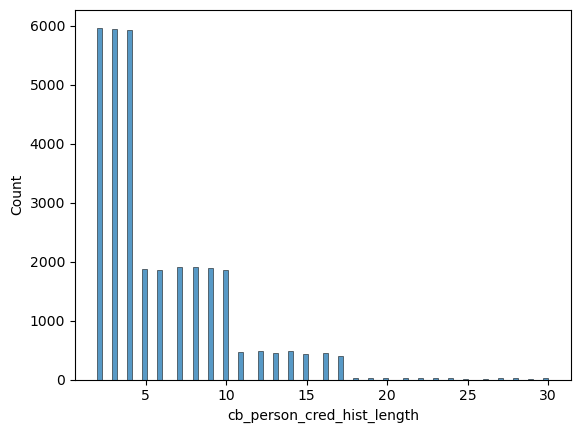

In [13]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

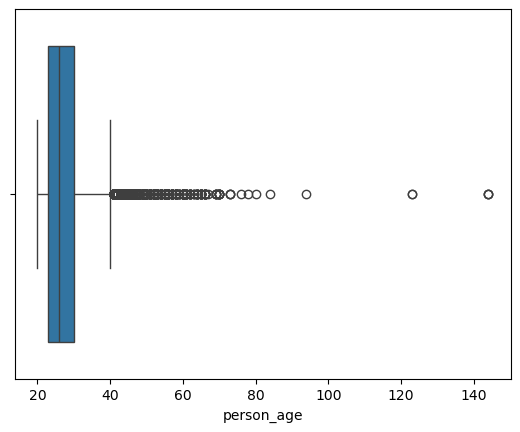

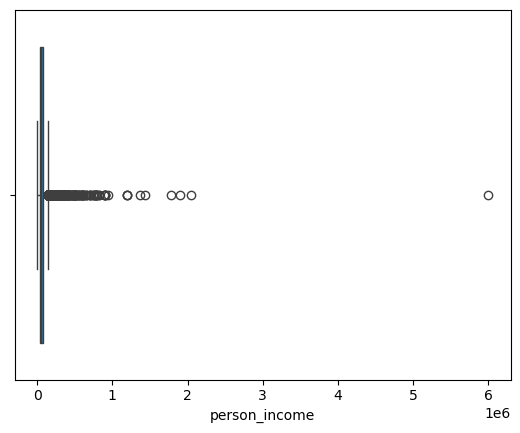

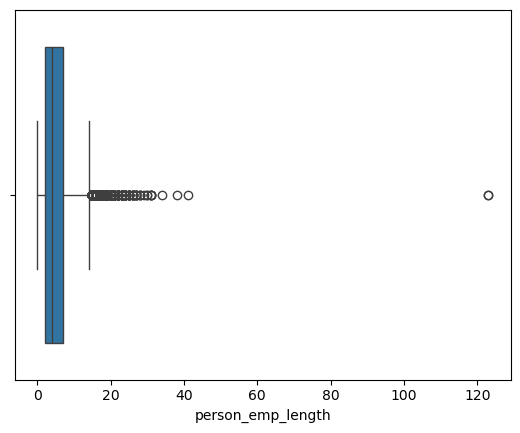

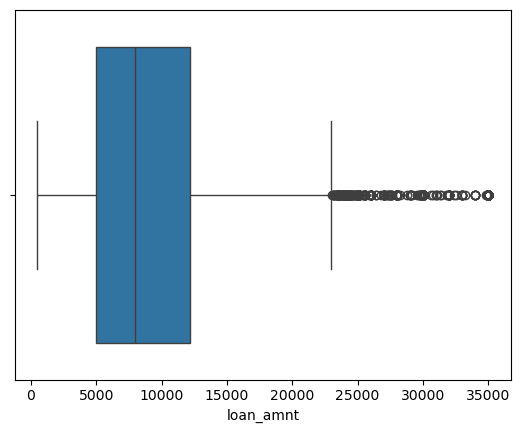

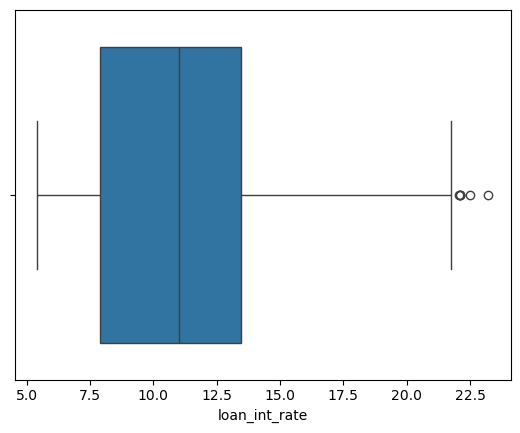

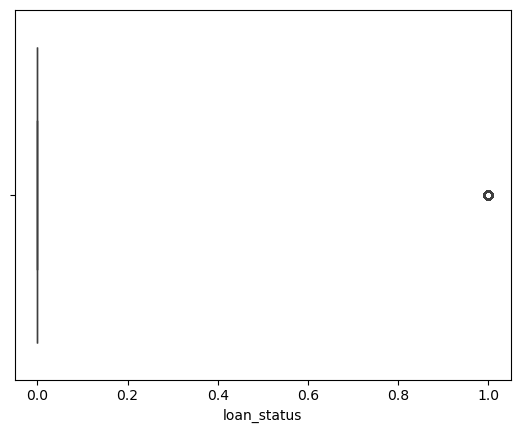

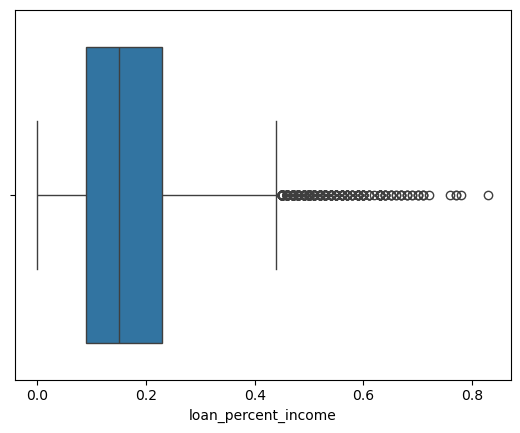

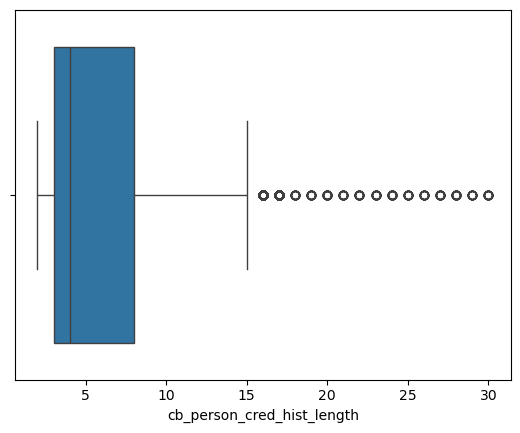

In [14]:
#Identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

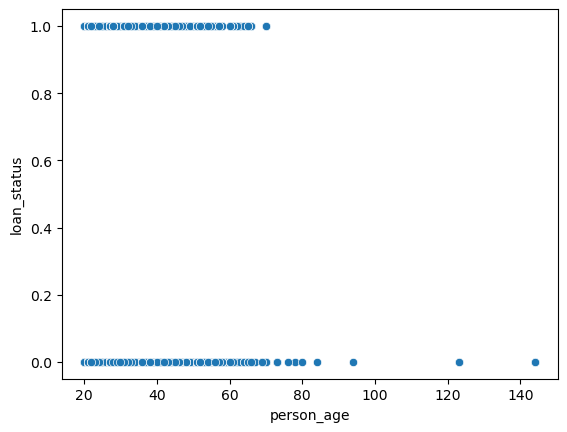

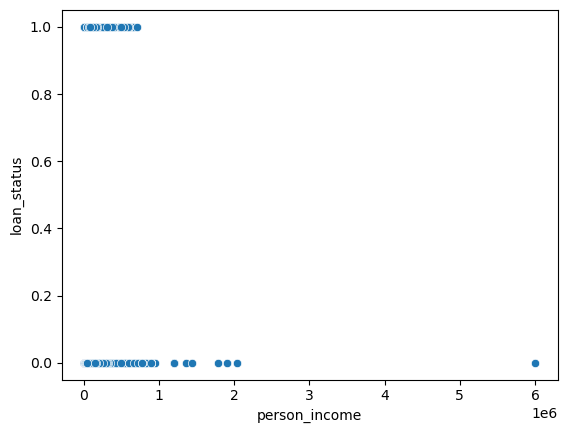

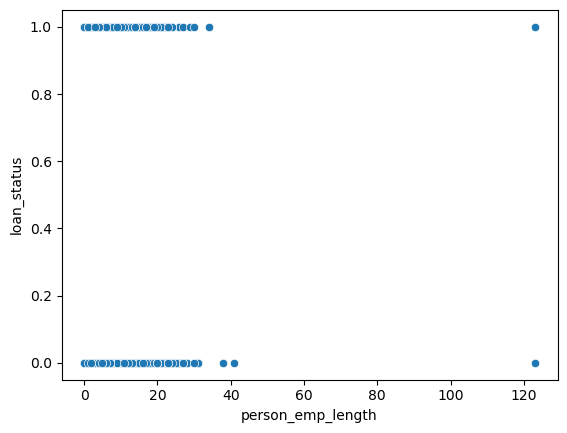

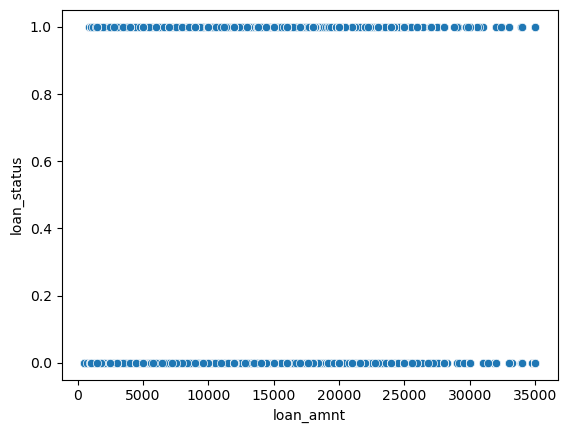

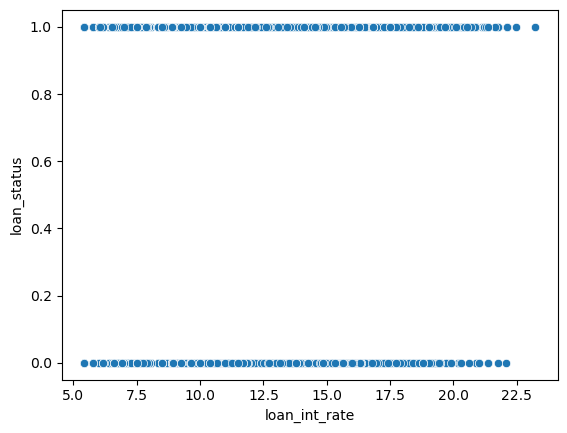

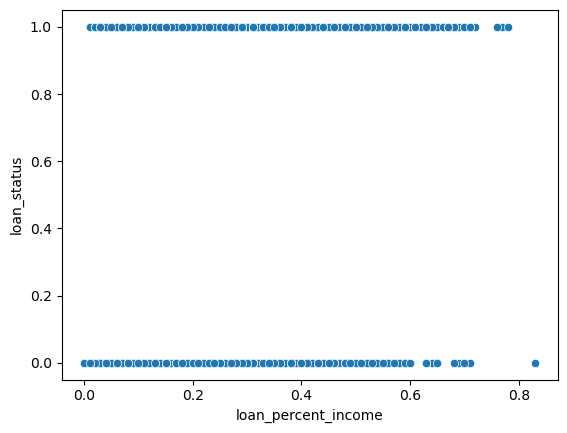

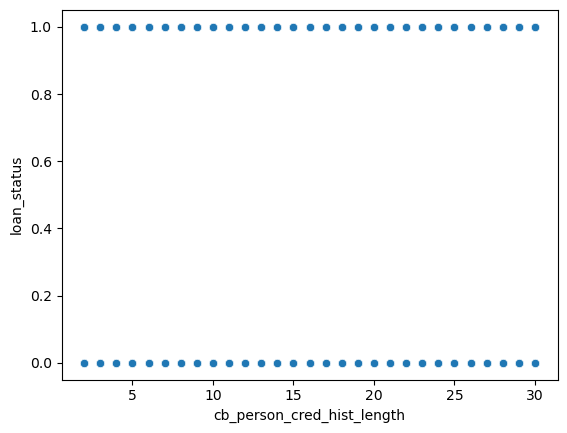

In [15]:
#Scatter plot to understand the relationship
for i in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']:
    sns.scatterplot(data=df,x=i,y='loan_status')
    plt.show()

In [16]:
df.select_dtypes(include="number").columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
#Correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

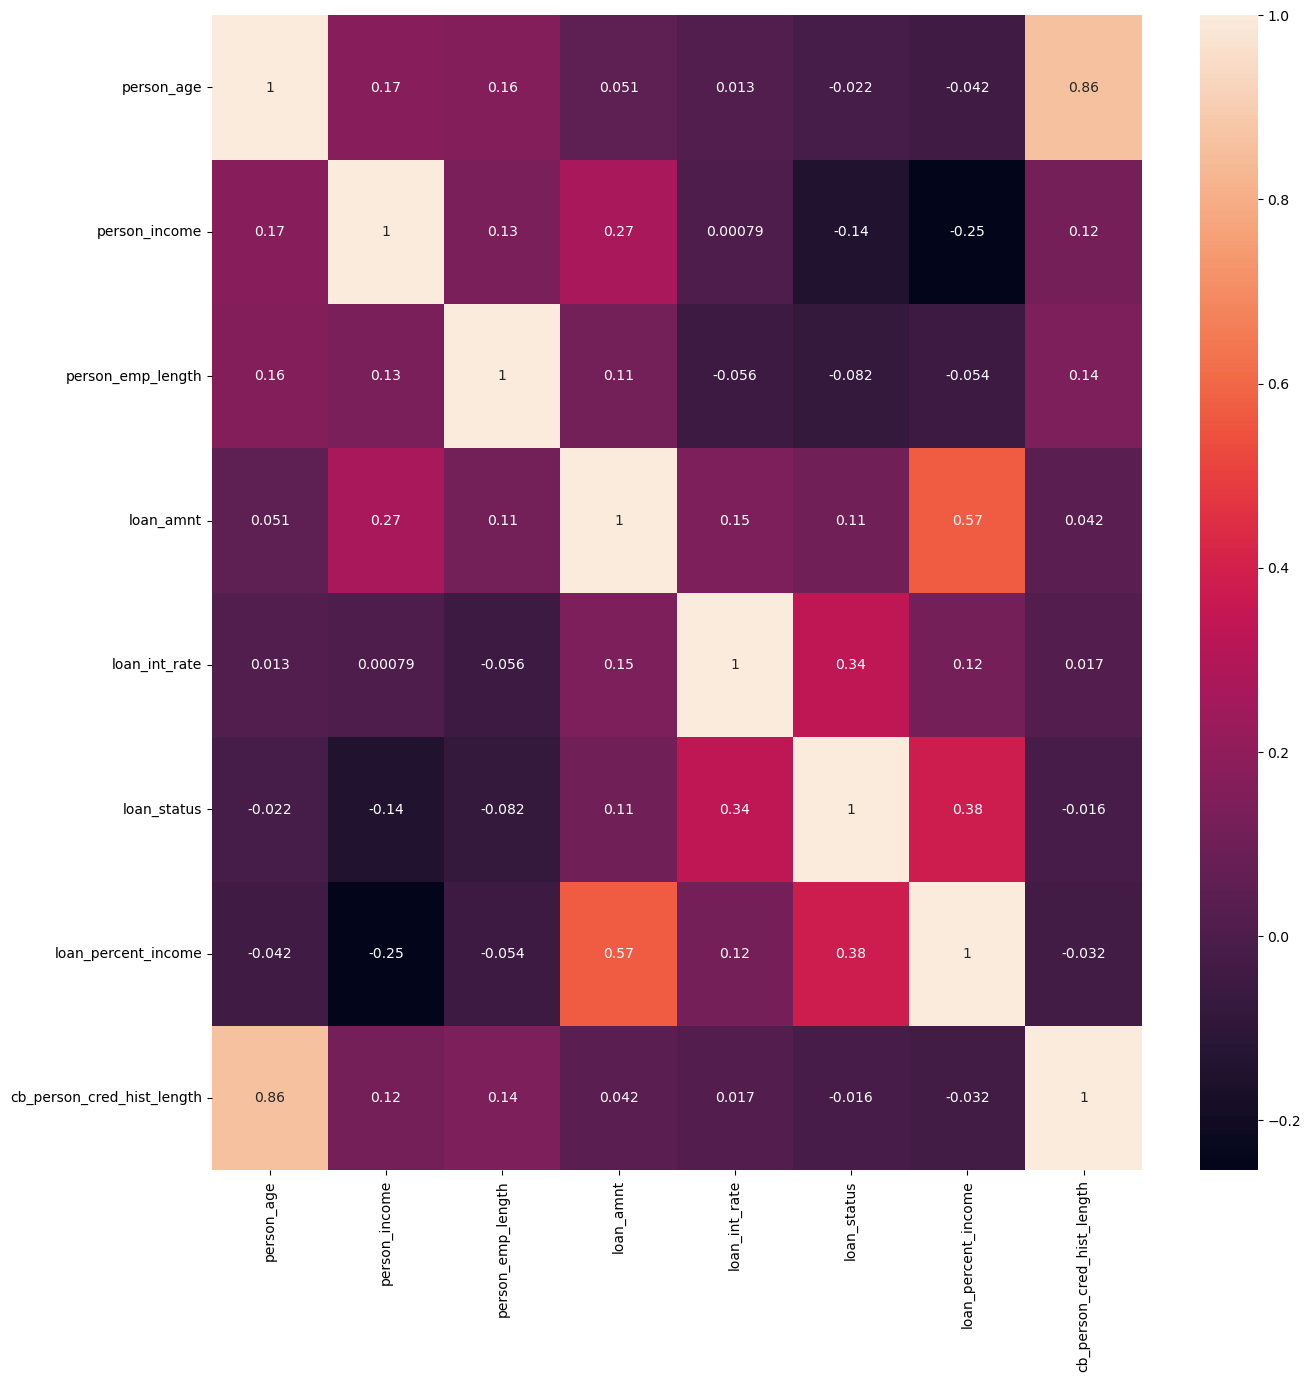

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

## Missing Value

In [19]:
#Fill missing values with median for numerical columns
df = df.assign(
    person_emp_length=df['person_emp_length'].fillna(df['person_emp_length'].median()),
    loan_int_rate=df['loan_int_rate'].fillna(df['loan_int_rate'].median())
)

In [20]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Outliers

In [21]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [22]:
for i in ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

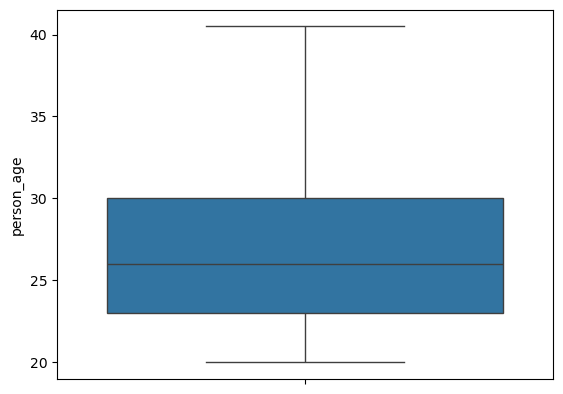

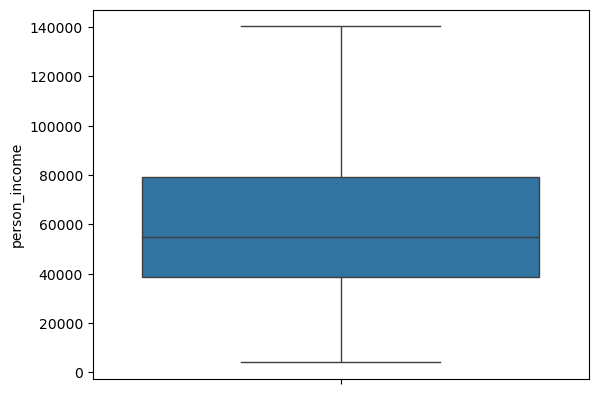

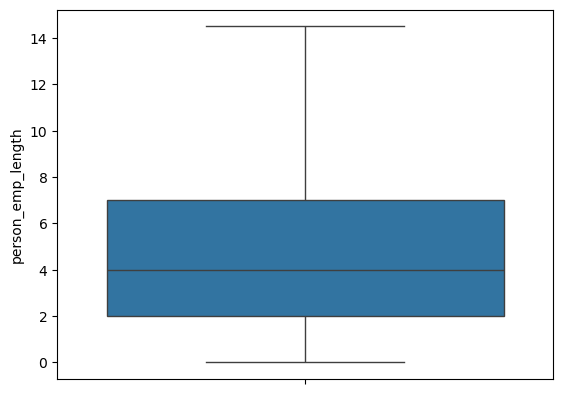

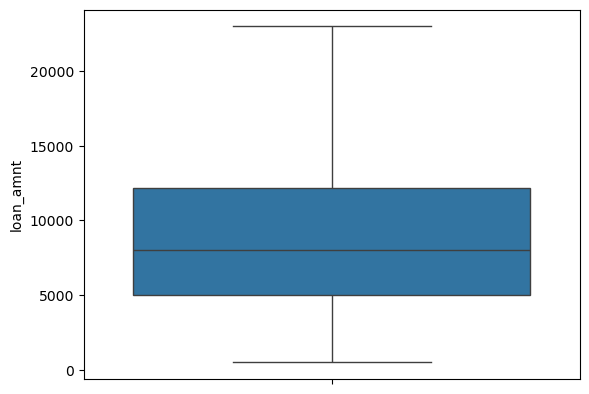

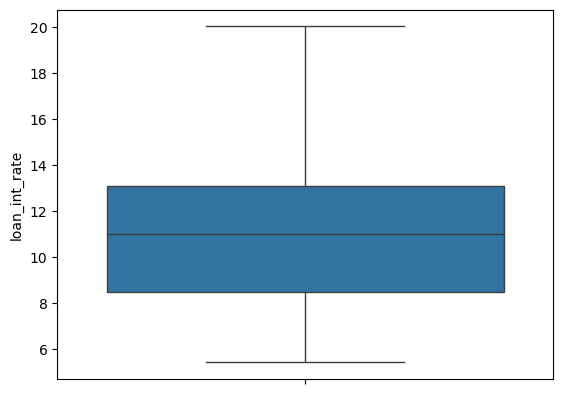

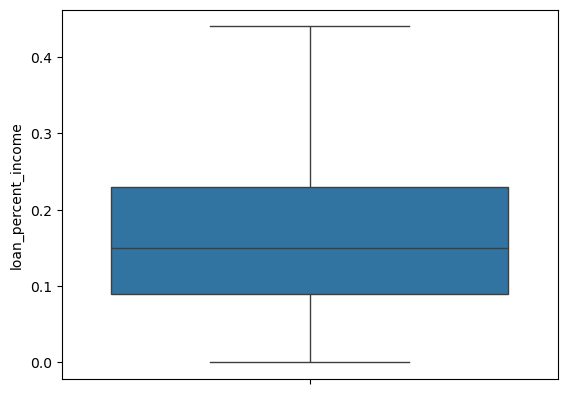

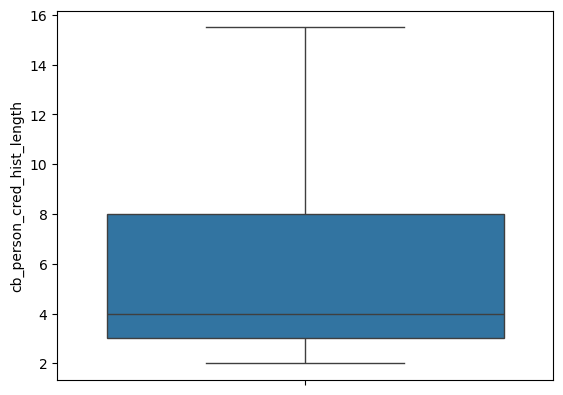

In [23]:
for i in ['person_age', 'person_income',
       'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']:
    sns.boxplot(df[i])
    plt.show()

## Duplicates

In [24]:
df.drop_duplicates()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,14.5,PERSONAL,23000.0,16.02,1,0.44,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,1000.0,11.14,0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,5500.0,12.87,1,0.44,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,23000.0,15.23,1,0.44,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,23000.0,14.27,1,0.44,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...
32571,40.5,45600.0,RENT,1.0,VENTURE,20000.0,10.00,1,0.44,N,15.5
32574,40.5,65004.0,RENT,4.0,PERSONAL,20000.0,15.58,1,0.31,Y,15.5
32575,40.5,64500.0,RENT,0.0,EDUCATION,5000.0,11.26,0,0.08,N,15.5
32576,40.5,53000.0,MORTGAGE,1.0,PERSONAL,5800.0,13.16,0,0.11,N,15.5


## ***

In [25]:
# Create new features
df['debt_to_income'] = df['loan_amnt'] / df['person_income']
df['age_to_employment_ratio'] = df['person_age'] / (df['person_emp_length'] + 1)  # +1 to avoid division by zero
df['interest_to_income'] = df['loan_int_rate'] / df['person_income']
df['credit_history_to_age'] = df['cb_person_cred_hist_length'] / df['person_age']

# Age bins (categorical feature)
df['age_group'] = pd.cut(df['person_age'], 
                         bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

# Income bins
df['income_group'] = pd.cut(df['person_income'],
                           bins=[0, 30000, 50000, 75000, 100000, 150000, float('inf')],
                           labels=['Low', 'Below Average', 'Average', 'Above Average', 'High', 'Very High'])
df = pd.get_dummies(df, columns=['income_group'], drop_first=True)

## Encoding of Data

In [26]:
df = pd.get_dummies(df,columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'],drop_first=True)

In [27]:
print(df.dtypes)

person_age                     float64
person_income                  float64
person_emp_length              float64
loan_amnt                      float64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
cb_person_cred_hist_length     float64
debt_to_income                 float64
age_to_employment_ratio        float64
interest_to_income             float64
credit_history_to_age          float64
age_group_26-35                   bool
age_group_36-45                   bool
age_group_46-55                   bool
age_group_56-65                   bool
age_group_65+                     bool
income_group_Below Average        bool
income_group_Average              bool
income_group_Above Average        bool
income_group_High                 bool
income_group_Very High            bool
person_home_ownership_OTHER       bool
person_home_ownership_OWN         bool
person_home_ownership_RENT        bool
loan_intent_EDUCATION    

## Train-Test Split

In [28]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [29]:
X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [30]:
#Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

In [32]:
print(f"Training set shape: {X_train.shape}")
print(f"Training label distribution: {Counter(y_train)}")

Training set shape: (26064, 30)
Training label distribution: Counter({0: 20401, 1: 5663})


In [33]:
pca = PCA()
pca.fit(X_train)

PCA()

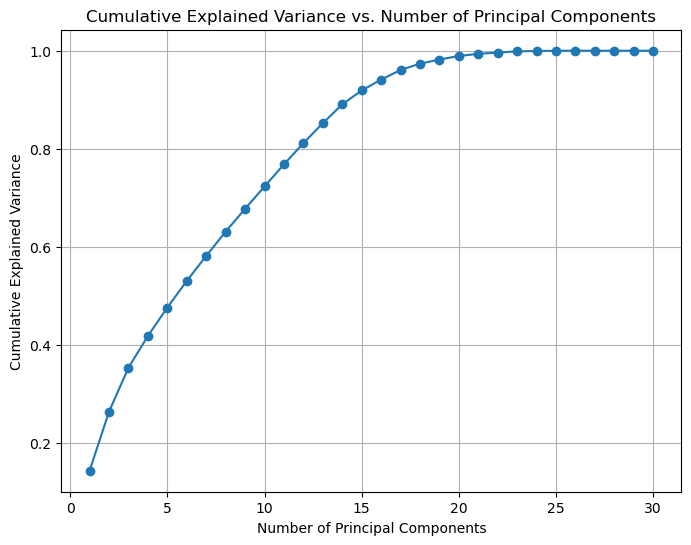

In [34]:
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [35]:
optimal_n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1  # Find the smallest number of components that explain 90% of the variance
print(f"Optimal number of components for 90% variance: {optimal_n_components}")

Optimal number of components for 90% variance: 15


In [36]:
pca = PCA(n_components=optimal_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_pca: (26064, 15)
Shape of y_train: (26064,)


In [38]:
# X_sample = X_train_pca[:3000]
# y_sample = y_train_sm[:3000]

## Model Selection and Training

***Random Forest***

In [39]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [40]:
# implement Random Forest with default parameters
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

In [42]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [43]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")

Random Forest Performance:
Accuracy: 0.9132
Precision: 0.9279
Recall: 0.6595
F1 Score: 0.7710
ROC AUC: 0.8225


In [44]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5072
           1       0.93      0.66      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517



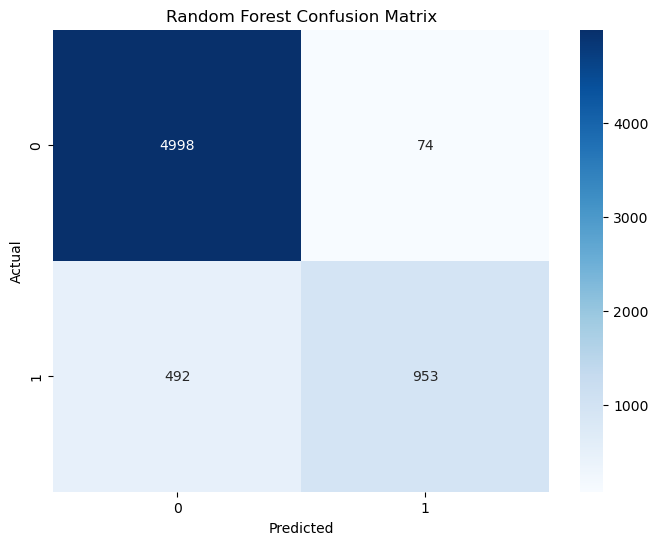

In [45]:
# Plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [46]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

In [47]:
print("\nTop 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                       Feature  Importance
7               debt_to_income    0.149416
4                loan_int_rate    0.128268
5          loan_percent_income    0.114193
9           interest_to_income    0.112125
1                person_income    0.092375
23  person_home_ownership_RENT    0.070012
3                    loan_amnt    0.053787
8      age_to_employment_ratio    0.047069
10       credit_history_to_age    0.036472
2            person_emp_length    0.032055


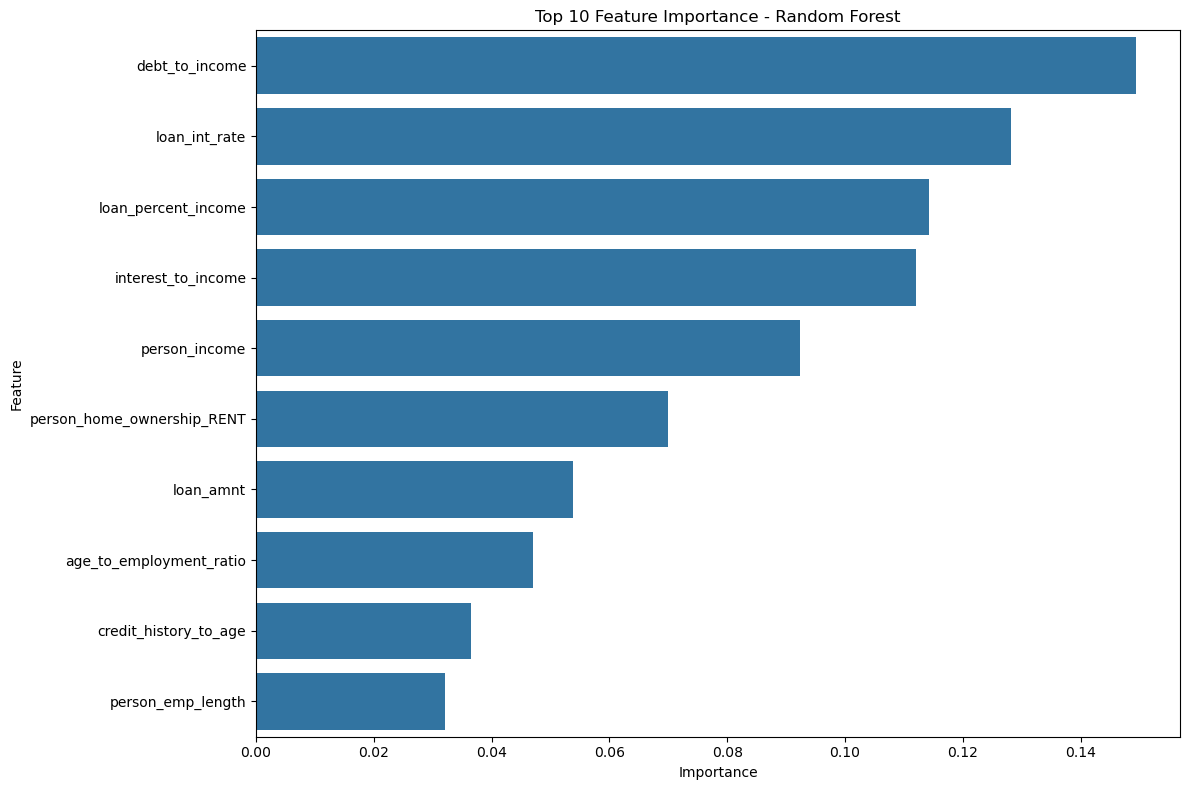

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [49]:
# Define parameter grid (using a smaller grid for demonstration)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [50]:
# GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

In [51]:
grid_search.fit(X_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Use the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

In [53]:
# Calculate metrics for best model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)

In [54]:
print("\nTuned Random Forest Performance:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1 Score: {f1_best_rf:.4f}")
print(f"ROC AUC: {roc_auc_best_rf:.4f}")


Tuned Random Forest Performance:
Accuracy: 0.9138
Precision: 0.9257
Recall: 0.6644
F1 Score: 0.7736
ROC AUC: 0.8246


In [55]:
# Print classification report for tuned model
print("\nClassification Report (Tuned RF):")
print(classification_report(y_test, y_pred_best_rf))


Classification Report (Tuned RF):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5072
           1       0.93      0.66      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517



***Naive Bayes***

In [56]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [57]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [58]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)

BernoulliNB()

In [59]:
X_train_min = np.min(X_train.values)  
if X_train_min < 0:
    min_X_train = X_train - X_train_min
complement_model = ComplementNB()
complement_model.fit(min_X_train, y_train)

ComplementNB()

In [60]:
multinomial_model = MultinomialNB()
multinomial_model.fit(min_X_train, y_train)

MultinomialNB()

In [61]:
param_grid = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6]}
grid_GaussianNB = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_GaussianNB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]})

In [62]:
def evaluate_model(model, X_test, y_test, threshold=0.5, model_name="Model"):
    # Use predicted probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Apply threshold manually
    y_pred_custom = (y_prob >= threshold).astype(int)

    # Confusion Matrix
    cm_custom = confusion_matrix(y_test, y_pred_custom)
    true_neg, false_pos = cm_custom[0]
    false_neg, true_pos = cm_custom[1]

    # Metrics
    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg), 3)
    precision = round(true_pos / (true_pos + false_pos), 3) if (true_pos + false_pos) > 0 else 0
    recall = round(true_pos / (true_pos + false_neg), 3) if (true_pos + false_neg) > 0 else 0
    f1 = round(2 * (precision * recall) / (precision + recall), 3) if (precision + recall) > 0 else 0
    auc = round(roc_auc_score(y_test, y_prob), 4)

    # Print results
    print(f"=== {model_name} ===")
    print(classification_report(y_test, y_pred_custom))
    print(f"Custom Threshold: {threshold}")
    print("Confusion Matrix:\n", cm_custom)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC Score: {auc}")
    print("="*40)

    return cm_custom,accuracy,precision,recall,f1,auc


In [63]:
gaussian = evaluate_model(gaussian_model, X_test, y_test, threshold=0.5, model_name="GaussianNB")

=== GaussianNB ===
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5072
           1       0.54      0.67      0.60      1445

    accuracy                           0.80      6517
   macro avg       0.72      0.75      0.73      6517
weighted avg       0.82      0.80      0.81      6517

Custom Threshold: 0.5
Confusion Matrix:
 [[4249  823]
 [ 475  970]]
Accuracy: 0.801
Precision: 0.541
Recall: 0.671
F1 Score: 0.599
ROC-AUC Score: 0.8232


In [64]:
bernoulli = evaluate_model(bernoulli_model, X_test, y_test, threshold=0.35, model_name="BernoulliNB")

=== BernoulliNB ===
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      5072
           1       0.45      0.66      0.54      1445

    accuracy                           0.75      6517
   macro avg       0.67      0.72      0.68      6517
weighted avg       0.79      0.75      0.76      6517

Custom Threshold: 0.35
Confusion Matrix:
 [[3898 1174]
 [ 486  959]]
Accuracy: 0.745
Precision: 0.45
Recall: 0.664
F1 Score: 0.536
ROC-AUC Score: 0.788


In [65]:
complement = evaluate_model(complement_model, X_test, y_test, threshold=0.35, model_name="ComplementNB")

=== ComplementNB ===
              precision    recall  f1-score   support

           0       0.94      0.46      0.62      5072
           1       0.32      0.90      0.47      1445

    accuracy                           0.56      6517
   macro avg       0.63      0.68      0.55      6517
weighted avg       0.80      0.56      0.59      6517

Custom Threshold: 0.35
Confusion Matrix:
 [[2358 2714]
 [ 150 1295]]
Accuracy: 0.561
Precision: 0.323
Recall: 0.896
F1 Score: 0.475
ROC-AUC Score: 0.8191


In [66]:
multinomial = evaluate_model(multinomial_model, X_test, y_test, threshold=0.4, model_name="MultinomialNB")

=== MultinomialNB ===
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      5072
           1       0.49      0.68      0.57      1445

    accuracy                           0.77      6517
   macro avg       0.69      0.74      0.71      6517
weighted avg       0.81      0.77      0.78      6517

Custom Threshold: 0.4
Confusion Matrix:
 [[4042 1030]
 [ 461  984]]
Accuracy: 0.771
Precision: 0.489
Recall: 0.681
F1 Score: 0.569
ROC-AUC Score: 0.8191


In [67]:
gridGaussianNB = evaluate_model(grid_GaussianNB.best_estimator_, X_test, y_test, threshold=0.4, model_name="grid_GaussianNB")

=== grid_GaussianNB ===
              precision    recall  f1-score   support

           0       0.90      0.81      0.86      5072
           1       0.51      0.69      0.59      1445

    accuracy                           0.79      6517
   macro avg       0.71      0.75      0.72      6517
weighted avg       0.82      0.79      0.80      6517

Custom Threshold: 0.4
Confusion Matrix:
 [[4129  943]
 [ 450  995]]
Accuracy: 0.786
Precision: 0.513
Recall: 0.689
F1 Score: 0.588
ROC-AUC Score: 0.8232


***XGBoost***

In [68]:
from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [69]:
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5072
           1       0.93      0.71      0.80      1445

    accuracy                           0.92      6517
   macro avg       0.93      0.85      0.88      6517
weighted avg       0.92      0.92      0.92      6517

Confusion Matrix:
 [[4998   74]
 [ 425 1020]]
Accuracy: 0.9234
Precision: 0.9324
Recall: 0.7059
F1 Score: 0.8035
ROC AUC Score: 0.9423


***Gradient Boosting Classifier（GBC)***

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import learning_curve

In [72]:
# Set random seed for reproducibility
np.random.seed(42)

In [73]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.5],     # Learning rate shrinks contribution of each tree
    'max_depth': [3, 5, 7],                # Maximum depth of the individual trees
    'subsample': [0.8, 1.0]                # Fraction of samples used for fitting the trees
}

In [74]:
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [75]:
# Get the best model and parameters
best_gb = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [76]:
# Get predicted probabilities for the test set
y_pred_proba = best_gb.predict_proba(X_test_pca)[:, 1]

In [77]:
# Apply custom threshold (similar to your SVM approach)
threshold = 0.3  # You can adjust this threshold as needed
y_pred_custom_threshold = (y_pred_proba > threshold).astype(int)

In [78]:
# Generate evaluation metrics and confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom_threshold)
print("Model Evaluation Results (Custom Threshold):")
print("Accuracy:", accuracy_score(y_test, y_pred_custom_threshold))
print("Classification Report:\n", classification_report(y_test, y_pred_custom_threshold))
print("Confusion Matrix:\n", conf_matrix)

Model Evaluation Results (Custom Threshold):
Accuracy: 0.8634340954426883
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      5072
           1       0.69      0.70      0.70      1445

    accuracy                           0.86      6517
   macro avg       0.80      0.81      0.80      6517
weighted avg       0.86      0.86      0.86      6517

Confusion Matrix:
 [[4611  461]
 [ 429 1016]]


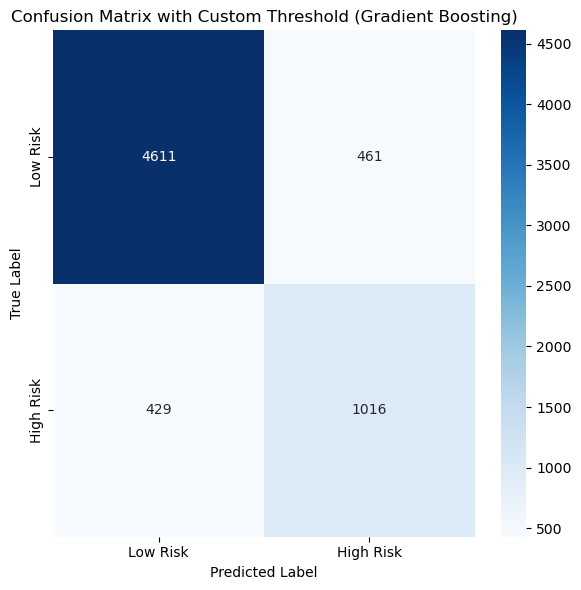

In [79]:
# Plot confusion matrix
thresh = conf_matrix.max() / 2.
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=True,
            xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix with Custom Threshold (Gradient Boosting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

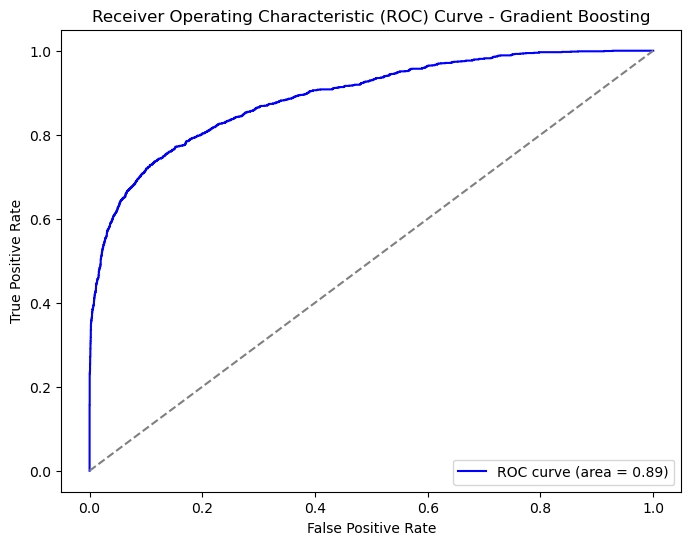

In [80]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

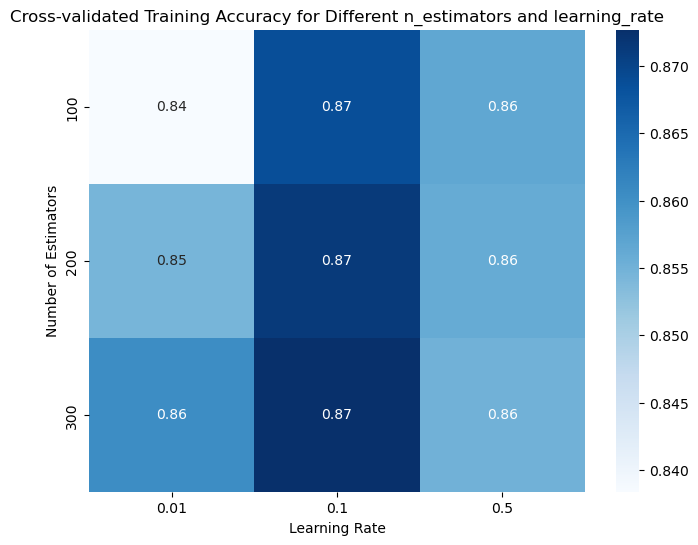

Cross-validated training accuracy: 0.8763812154696132


In [81]:
# Create heatmap of cross-validated results for n_estimators and learning_rate
result_df = pd.DataFrame(grid_search.cv_results_)
pivot_df = result_df.pivot_table(
    index='param_n_estimators', 
    columns='param_learning_rate', 
    values='mean_test_score'
)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues', cbar=True)
plt.title('Cross-validated Training Accuracy for Different n_estimators and learning_rate')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()

print("Cross-validated training accuracy:", grid_search.best_score_)

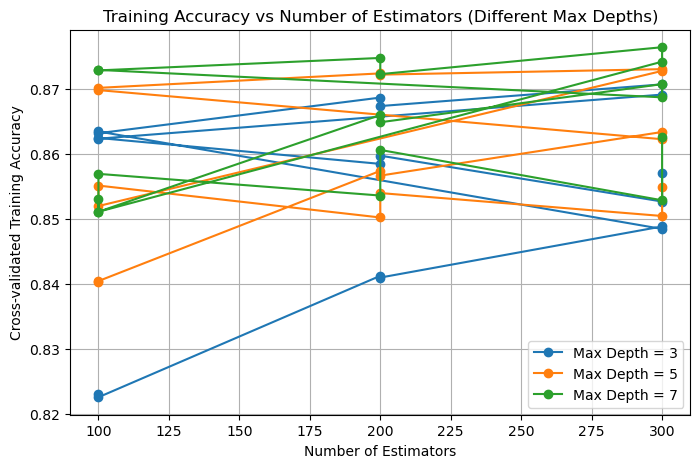

In [82]:
# Plot training accuracy vs n_estimators for different max_depths
plt.figure(figsize=(8, 5))
for max_depth in [3, 5, 7]:
    depth_results = result_df[result_df['param_max_depth'] == max_depth]
    plt.plot(depth_results['param_n_estimators'], 
             depth_results['mean_test_score'], 
             marker='o', 
             label=f'Max Depth = {max_depth}')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-validated Training Accuracy')
plt.title('Training Accuracy vs Number of Estimators (Different Max Depths)')
plt.legend()
plt.grid(True)
plt.show()

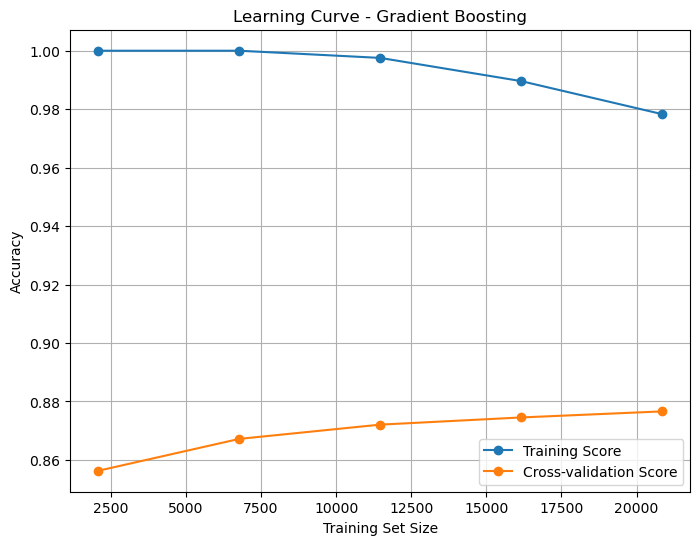

In [83]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_gb, X_train_pca, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation Score")
plt.title("Learning Curve - Gradient Boosting")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [84]:
# Feature importance
feature_importance = pd.DataFrame(
    {'Feature': X_train_pca.columns if hasattr(X_train_pca, 'columns') else [f'Feature {i}' for i in range(X_train_pca.shape[1])],
     'Importance': best_gb.feature_importances_}
)
feature_importance = feature_importance.sort_values('Importance', ascending=False)

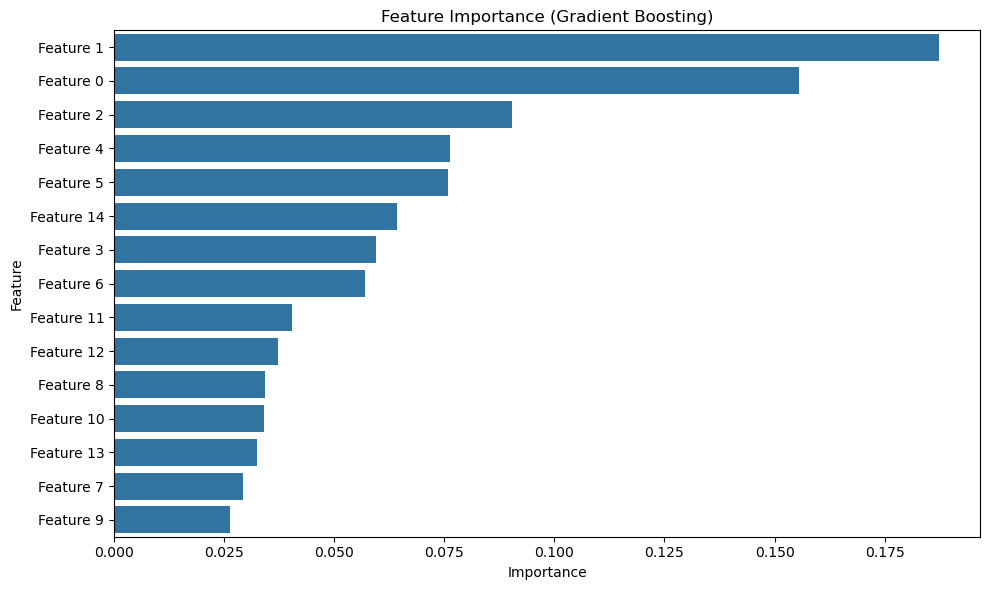

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

In [86]:
print("Summary:")
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Cross-validated training accuracy: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_custom_threshold):.4f}") 
print(f"ROC AUC Score: {roc_auc:.4f}")

Summary:
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Cross-validated training accuracy: 0.8764
Test Accuracy: 0.8634
ROC AUC Score: 0.8899


***Comparison***

In [87]:
# Create dictionary of models
models = {
    "Random Forest (Tuned)": best_rf,
    'Gradient Boosting': best_gb,
    "Naive Bayes": gaussian_model,
    "XGBoost": xgb
}

In [88]:
# Lists to store results
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [89]:
# Train and evaluate each model
for name, model in models.items():
    if name != "Random Forest (Tuned)":
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Some models might not have predict_proba
    try:
        y_pred_proba = model.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except:
        roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store results
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Print classification report
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred))


Random Forest (Tuned) Performance:
Accuracy: 0.9138
Precision: 0.9257
Recall: 0.6644
F1 Score: 0.7736
ROC AUC: 0.9305

Classification Report (Random Forest (Tuned)):
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5072
           1       0.93      0.66      0.77      1445

    accuracy                           0.91      6517
   macro avg       0.92      0.82      0.86      6517
weighted avg       0.91      0.91      0.91      6517


Gradient Boosting Performance:
Accuracy: 0.9274
Precision: 0.9301
Recall: 0.7273
F1 Score: 0.8163
ROC AUC: 0.9476

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5072
           1       0.93      0.73      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.92      6517


Naive Bayes Perform

In [90]:
# Create a DataFrame with all results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

In [91]:
# Sort by F1 score (often a good balance of precision and recall)
results_df = results_df.sort_values('F1 Score', ascending=False)

In [92]:
print("\nModel Comparison Summary:")
print(results_df)


Model Comparison Summary:
                   Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
1      Gradient Boosting  0.927421   0.930088  0.727336  0.816311  0.947610
3                XGBoost  0.923431   0.932358  0.705882  0.803466  0.942262
0  Random Forest (Tuned)  0.913764   0.925747  0.664360  0.773570  0.930486
2            Naive Bayes  0.800829   0.540993  0.671280  0.599135  0.823227


***Visualise***

In [93]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

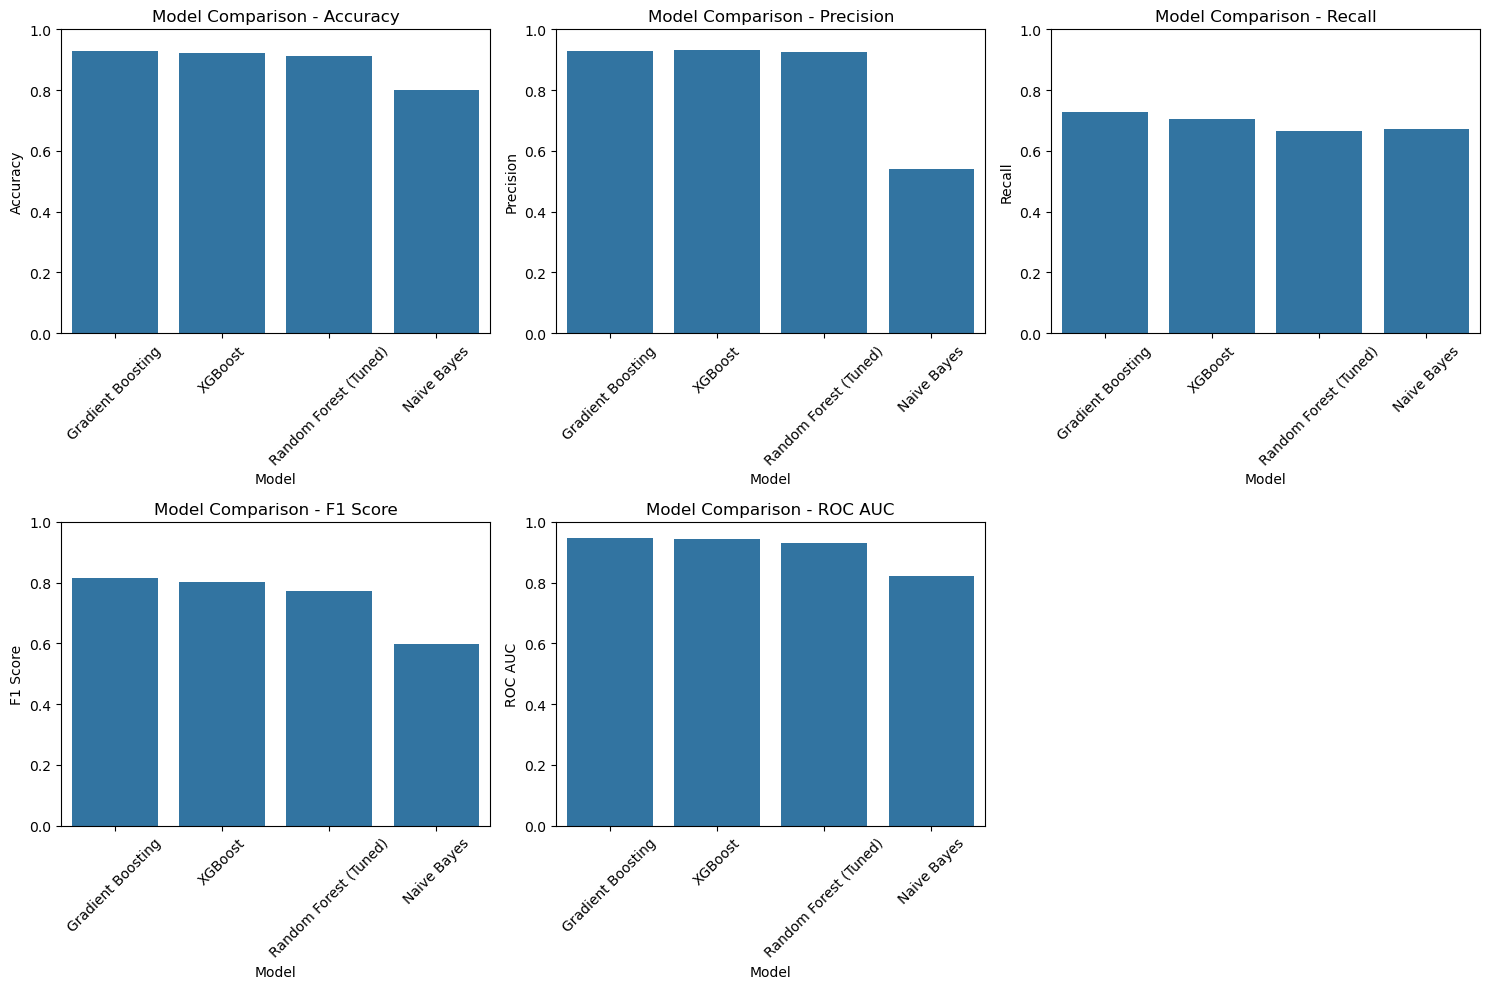

In [94]:
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # All metrics range from 0 to 1
plt.tight_layout()
plt.show()

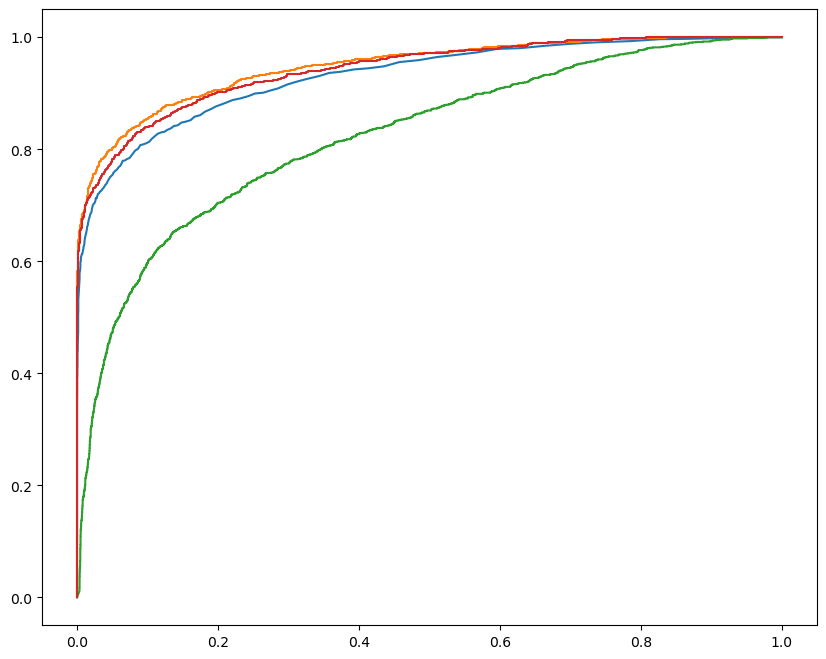

In [95]:
# ROC curve comparison for all models
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_curve

for name, model in models.items():
    try:
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    except:
        y_pred = model.predict(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.3f})')

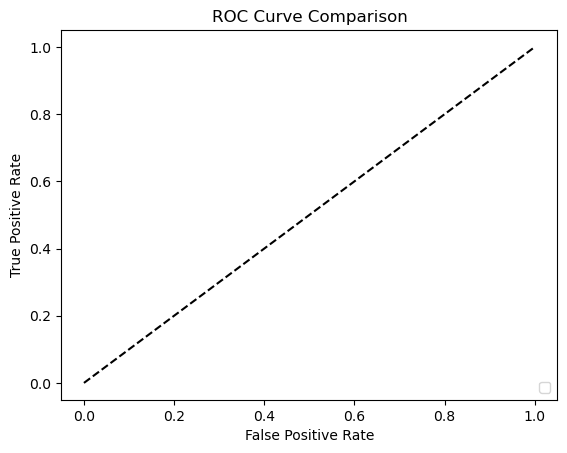

In [96]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [97]:
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest performing model: {best_model_name}")


Best performing model: Gradient Boosting


In [98]:
from joblib import dump

In [102]:
import os
print(os.getcwd())

C:\Users\admin\Desktop


In [107]:
dump(best_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [108]:
dump(gaussian_model, 'gaussian_nb_model.joblib')
dump(xgb, 'xgb_classifier_model.joblib')

['xgb_classifier_model.joblib']

In [109]:
dump(best_gb, 'gradient_boosting_model.joblib')

['gradient_boosting_model.joblib']